### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



--- Resumen de facturación por Tienda ---
La Tienda 1 facturó $ 1089502500, lo que representa 26.13% del total.
La Tienda 2 facturó $ 1056858400, lo que representa 25.35% del total.
La Tienda 3 facturó $ 1039503000, lo que representa 24.93% del total.
La Tienda 4 facturó $ 983058300, lo que representa 23.58% del total.


--- DataFrame preparado para el gráfico ---
     Tienda  Facturación ($)  Porcentaje (%)
0  Tienda 1       1089502500           26.13
1  Tienda 2       1056858400           25.35
2  Tienda 3       1039503000           24.93
3  Tienda 4        983058300           23.58




/tmp/ipython-input-1-218381517.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Facturación ($)', data=df_facturacion, palette='viridis')


KeyError: 'Facturacion ($)'

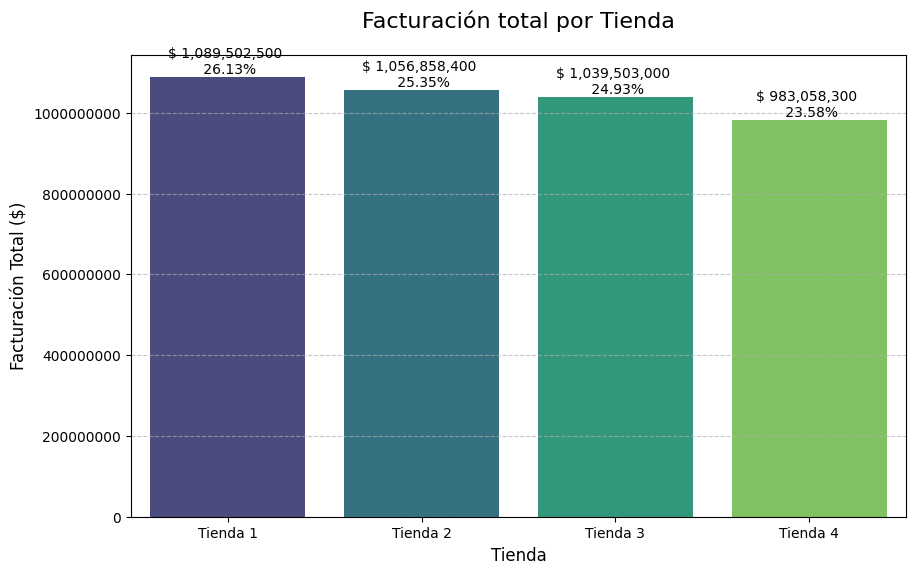

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt #importamos matplotlib para graficar
import seaborn as sns #importamos seaborn para gráficos más estéticos


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

nombre_tiendas = ['tienda', 'tienda2', 'tienda3', 'tienda4']
nombres_para_mostrar = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

def facturacion(tienda_df):
   subtotal_precio = sum(tienda_df['Precio'])
   costos = sum(tienda_df['Costo de envío'])
   total = int(subtotal_precio - costos)
   return total


resultado_facturacion = []
facturacion_tienda = [facturacion(tienda), facturacion(tienda2), facturacion(tienda3), facturacion(tienda4)]
total_facturacion = sum(facturacion_tienda)

porcentual_facturación = []

for i in facturacion_tienda:
  porcentual_facturación.append(round((i / total_facturacion) * 100, 2))

#usamos "nombres para mostrar"
resultado_facturacion = list(zip(nombres_para_mostrar, facturacion_tienda, porcentual_facturación))

#imprimir los resultados, código original ajustado para usar "nombres para mostrar"
print("--- Resumen de facturación por Tienda ---")
for r in range(len(resultado_facturacion)):
  print(f'La {resultado_facturacion[r][0]} facturó $ {resultado_facturacion[r][1]}, lo que representa {resultado_facturacion[r][2]}% del total.')

print("\n") #salto de línea para separar la salida

# --- PASO 1: Preparar los datos en un DataFrame para el gráfico ---
#creamos un diccionario donde las claves serán los nombres de las columnas y los valores serán las listas de datos
datos_para_grafico = {
    'Tienda': nombres_para_mostrar, #nombres de las tiendas para el eje x
    'Facturación ($)': facturacion_tienda, #valores de facturación para el eje y
    'Porcentaje (%)': porcentual_facturación #porcentajes para etiquetas, si queremos
}

#convertimos el diccionario a un DataFrame de pandas
df_facturacion = pd.DataFrame(datos_para_grafico)

print("--- DataFrame preparado para el gráfico ---")
print(df_facturacion)
print("\n") #salto de línea para separar la salida

# --- PASO 2: Generar el gráfico de Barras ---
plt.figure(figsize=(10, 6)) #define el tamaño de la figura, ancho, alto, en pulgadas

#creamos el gráfico de barras (x='Tienda' en el eje horizontal, y='Facturación ($)' en el eje vertical)
sns.barplot(x='Tienda', y='Facturación ($)', data=df_facturacion, palette='viridis')

#añadimos etiquetas a cada barra
for index, row in df_facturacion.iterrows():
  plt.text(row.name, row['Facturación ($)'], f'${row["Facturación ($)"]: ,} \n {row["Porcentaje (%)"]:.2f}%', color='black', ha='center', va='bottom', fontsize=10)

#añadir título y etiquetas a los ejes
plt.title('Facturación total por Tienda', fontsize=16, pad=20) #título del gráfico
plt.xlabel('Tienda', fontsize=12) #etiqueta del eje x
plt.ylabel('Facturación Total ($)', fontsize=12) #etiqueta del eje Y

#mejorar la visualización
plt.grid(axis='y', linestyle='--', alpha=0.7) #agregar una grilla en el eje Y
plt.ticklabel_format(style='plain', axis='y') #quitar la notación científica en el eje Y
plt.ylim(0, max(df_facturacion['Facturacion ($)'])* 1.2) #ajustar límite superior del eje Y para que quepan las etiquetas

#mostrar el gráfico
plt.tight_layout() #ajusta el layout paran evitar quw las etiquetas se corten
plt.show()




# 2. Ventas por categoría

Tabla de Tienda 1: 
    Categoría del Producto       Precio
0  Artículos para el hogar   12698400.0
1     Deportes y diversión   39290000.0
2        Electrodomésticos  363685200.0
3             Electrónicos  429493500.0
4   Instrumentos musicales   91299000.0
5                 Juguetes   17995700.0
6                   Libros    8784900.0
7                  Muebles  187633700.0


Tabla de Tienda 2: 
    Categoría del Producto       Precio
0  Artículos para el hogar   14746900.0
1     Deportes y diversión   34744500.0
2        Electrodomésticos  348567800.0
3             Electrónicos  410831100.0
4   Instrumentos musicales  104990300.0
5                 Juguetes   15945400.0
6                   Libros   10091200.0
7                  Muebles  176426300.0


Tabla de Tienda 3: 
    Categoría del Producto       Precio
0  Artículos para el hogar   15060000.0
1     Deportes y diversión   35593100.0
2        Electrodomésticos  329237900.0
3             Electrónicos  410775800.0
4   Instrumentos

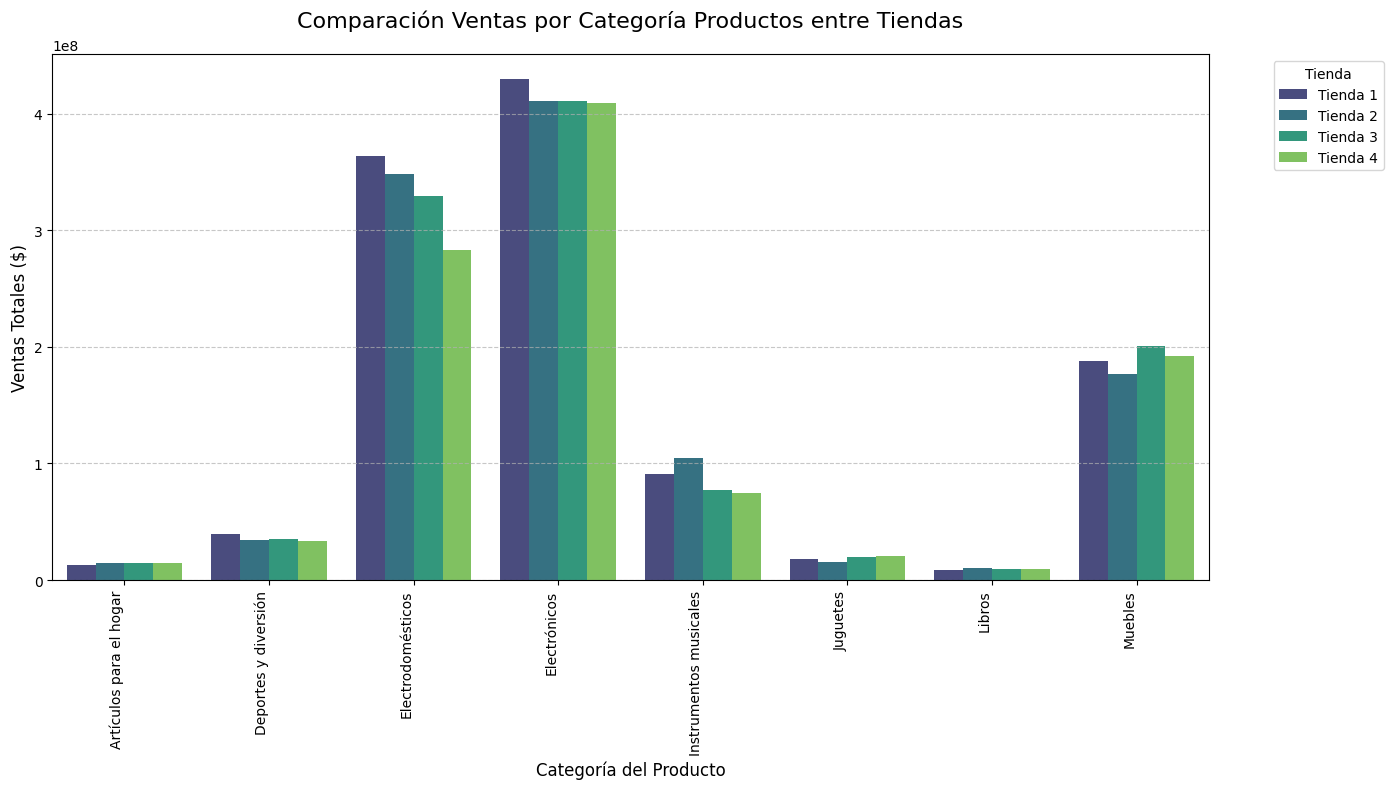

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt #importamos matplotlib para crear el gráfico
import seaborn as sns #para un gráfico más estético y fácil de hacer


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas_dfs = [tienda, tienda2, tienda3, tienda4] #modificado para que sea más claro que son DataFrames
nombres_para_mostrar = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

#recopilación de todas las ventas por categoría de todas las tiendas en 1 lista vacía
todas_las_ventas = []

for sucursal_df, nombre_tienda_actual in zip(tiendas_dfs, nombres_para_mostrar):

#suma de ventas por categoría
#.reset_index() convierte la "Categoría del Producto" de índice a columna
   suma_por_categoria = sucursal_df.groupby('Categoría del Producto')['Precio'].sum().reset_index()

#agregar una nueva columna llamada 'Tienda' al DataFrame e identificar a qué tienda pertenece cada fila de datos
   suma_por_categoria['Tienda'] = nombre_tienda_actual

#el DataFrame con la nueva columna 'Tienda' debe ser agregado a la lista maestra
   todas_las_ventas.append(suma_por_categoria)

#para seguir viendo las tablas individuales
   print(f'Tabla de {nombre_tienda_actual}: ')
   print(suma_por_categoria.drop(columns='Tienda')) #para mantener el formato original de la tabla
   print('\n')


#se unen todos los DataFrames individuales "todas_las_ventas" en un único DataFrame consolidado
df_ventas_consolidadas = pd.concat(todas_las_ventas, ignore_index=True) #para que los índices de las filas sean continuos "ignore_index=True"

print("--- DataFrame consolidado de ventas por categoría ---")
print(df_ventas_consolidadas.head(10)) #muestra 10 filas para verificar su estructura
print("\n") #salto de línea para separar la salida

#Generar el Gráfico de Barras Agrupadas
plt.figure(figsize=(14, 8)) #tamaño, ancho y alto en pulgadas

#de Seaborn, usar la función 'barplot' para crear el gráfico de barras
sns.barplot(x='Categoría del Producto', y='Precio', hue='Tienda', data=df_ventas_consolidadas, palette='viridis')

#título y etiquetas de los ejes
plt.title('Comparación Ventas por Categoría Productos entre Tiendas', fontsize=16, pad=20) #título del gráfico
plt.xlabel('Categoría del Producto', fontsize=12) #etiqueta del eje X
plt.ylabel('Ventas Totales ($)', fontsize=12) #etiqueta eje Y

plt.xticks(rotation=90, ha='right') #rotar las etiquetas del eje X para una mejor visualización, alineadas a la derecha
plt.grid(axis='y', linestyle='--', alpha=0.7) #agregar una grilla o cuadrícula en el eje Y
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left') #mover fuera del gráfico para no tapar las barras
plt.tight_layout() #ajusta el layout para evitar que las etiquetas se corten

plt.show()



# 3. Calificación promedio de la tienda


La Tienda 1 tiene una calificación promedio de 3.98
La Tienda 2 tiene una calificación promedio de 4.04
La Tienda 3 tiene una calificación promedio de 4.05
La Tienda 4 tiene una calificación promedio de 4.0

--- DataFrame de Calificaciones para el gráfico ---
     Tienda  Calificación Promedio
0  Tienda 1                   3.98
1  Tienda 2                   4.04
2  Tienda 3                   4.05
3  Tienda 4                   4.00




/tmp/ipython-input-1-1589569755.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Calificación Promedio', data=df_calificacion_promedio, palette='viridis')


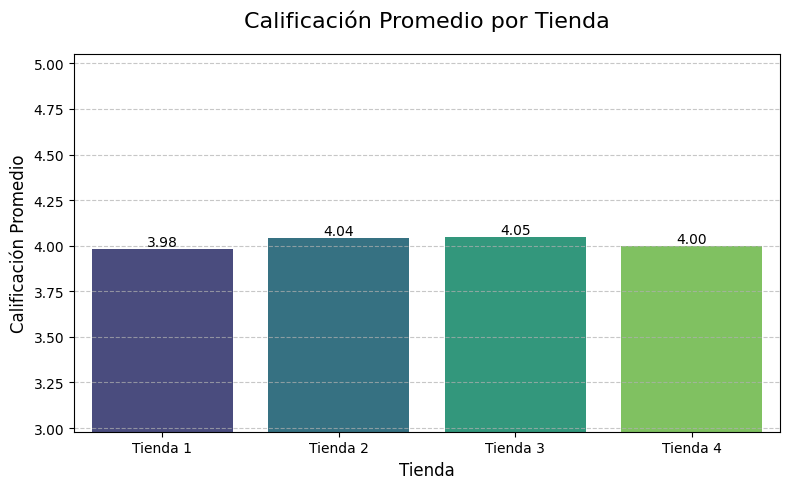

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt #para graficar
import seaborn as sns #para gráficos más estéticos


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


tiendas_dfs = [tienda, tienda2, tienda3, tienda4]
nombres_para_mostrar = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

promedio_calificacion = [] #lista vacía para los datos que van al gráfico. Cada elemento será un Dicc. con nombre tienda y calificación

#iterar sobre las tiendas y sus nombres para calcular y almacenar el promedio
for sucursal_df, nombre_tienda_actual in zip(tiendas_dfs, nombres_para_mostrar):
    #calcular el promedio de calificación de la tienda actual (sucursal)
    calificacion_actual = round(sucursal_df['Calificación'].mean(), 2)

    #imprimir el resultado para la tienda actual
    print(f'La {nombre_tienda_actual} tiene una calificación promedio de {calificacion_actual}')

    #almacenamos datos en una lista para el gráfico
    promedio_calificacion.append({'Tienda': nombre_tienda_actual, 'Calificación Promedio': calificacion_actual})


#DataFrame de pandas, fuente de datos para el gráfico (tomado desde la lista de diccionarios)
df_calificacion_promedio = pd.DataFrame(promedio_calificacion)

print("\n--- DataFrame de Calificaciones para el gráfico ---")
print(df_calificacion_promedio)
print("\n") #salto de línea

#tamaño gráfico
plt.figure(figsize=(8, 5))

#gráfico de barras con seaborn.barplot
sns.barplot(x='Tienda', y='Calificación Promedio', data=df_calificacion_promedio, palette='viridis')

#añadir etiquetas para mostrar el promedio
for index, row in df_calificacion_promedio.iterrows():
  plt.text(row.name, row['Calificación Promedio'], f'{row["Calificación Promedio"]:.2f}', color='black', ha="center", va='bottom', fontsize=10)

#título del gráfico
plt.title('Calificación Promedio por Tienda', fontsize=16, pad=20)

#etiquetas de los ejes
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)

min_calificacion = df_calificacion_promedio['Calificación Promedio'].min()
max_calificacion = df_calificacion_promedio['Calificación Promedio'].max()
plt.ylim(min_calificacion - 1, max_calificacion + 1) #ajustar el límite superior del eje Y para que quepan las etiquetas


#agregar una cuadrícula horizontal para facilitar la lectura de los valores
plt.grid(axis='y', linestyle='--', alpha=0.7)

#mejorar la visualización, ajustar el diseño
plt.tight_layout()

#mostrar el gráfico
plt.show()



# 4. Productos más y menos vendidos

La Tienda 1 ofrece "TV LED UHD 4K" como el producto más vendido (Ventas: $ 142,150,200.00) y "Cuerda para saltar" como el producto menos vendido (Ventas: $ 652,800.00).


La Tienda 2 ofrece "Iphone 15" como el producto más vendido (Ventas: $ 113,225,800.00) y "Cubo mágico 8x8" como el producto menos vendido (Ventas: $ 643,600.00).


La Tienda 3 ofrece "Refrigerador" como el producto más vendido (Ventas: $ 99,889,700.00) y "Cubo mágico 8x8" como el producto menos vendido (Ventas: $ 640,400.00).


La Tienda 4 ofrece "Iphone 15" como el producto más vendido (Ventas: $ 96,697,500.00) y "Cuerda para saltar" como el producto menos vendido (Ventas: $ 704,800.00).


--- DataFrame Productos más y menos vendidos para el gráfico ---
     Tienda            Producto       Ventas           Tipo
0  Tienda 1       TV LED UHD 4K  142150200.0    Más Vendido
1  Tienda 1  Cuerda para saltar     652800.0  Menos Vendido
2  Tienda 2           Iphone 15  113225800.0    Más Vendido
3  Tienda 2     Cubo mágico 

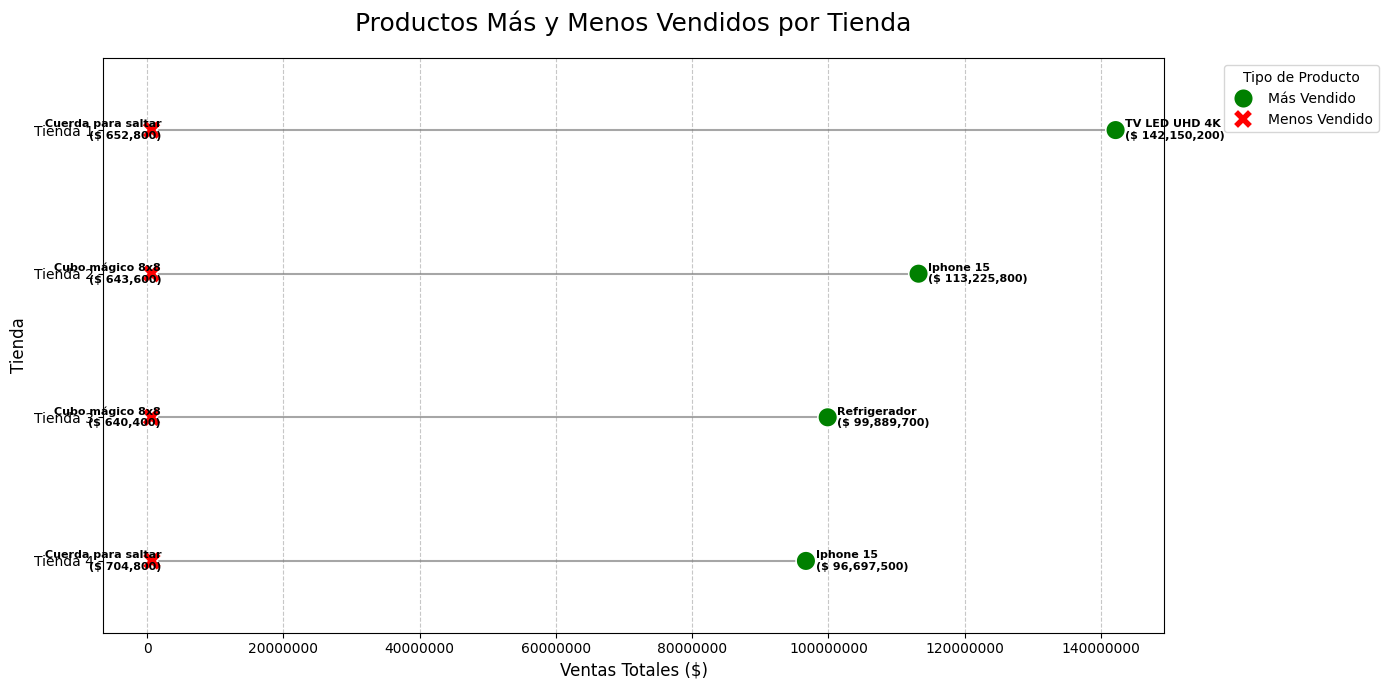

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt #para graficar
import seaborn as sns #para mejor visualización


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


tiendas_dfs = [tienda, tienda2, tienda3, tienda4] #listas de DataFrames
nombres_para_mostrar = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'] #nombres de tiendas

#lista vacía para almacenar los datos de los productos más y menos vendidos
productos_mas_menos_vendidos = []

#iterar sobre cada DataFrame de tienda y su nombre para encontrar los productos más y menos vendidos
for sucursal_df, nombre_tienda_actual in zip(tiendas_dfs, nombres_para_mostrar):
    #cálculo de la suma de precios por producto para la tienda actual
    ventas_por_producto = sucursal_df.groupby('Producto')['Precio'].sum()

    #encontrar el producto más vendido y su precio
    mas_vendido_producto = ventas_por_producto.idxmax()
    mas_vendido_precio = ventas_por_producto.max()

    #encontrar el producto menos vendido y su precio
    menos_vendido_producto = ventas_por_producto.idxmin()
    menos_vendido_precio = ventas_por_producto.min()

    #imprimir los resultados
    print(f'La {nombre_tienda_actual} ofrece "{mas_vendido_producto}" como el producto más vendido '
          f'(Ventas: ${mas_vendido_precio: ,.2f}) y "{menos_vendido_producto}" como el producto menos vendido '
          f'(Ventas: ${menos_vendido_precio: ,.2f}).')
    print('\n') #salto de línea

    #almacenamos los datos para el gráfico en la lista con 2 entradas (para producto más vendido y menos vendido)
    productos_mas_menos_vendidos.append({
        'Tienda': nombre_tienda_actual,
        'Producto': mas_vendido_producto, # Changed from 'Producto Más Vendido'
        'Ventas': mas_vendido_precio, # Changed from 'Precio de lo Más Vendido'
        'Tipo': 'Más Vendido'
    })

    productos_mas_menos_vendidos.append({
        'Tienda': nombre_tienda_actual,
        'Producto': menos_vendido_producto, # Changed from 'Producto Menos Vendido'
        'Ventas': menos_vendido_precio, # Changed from 'Precio de lo Menos Vendido'
        'Tipo': 'Menos Vendido'
    })


#el DataFrame de pandas (originado en la lista de diccionarios) será la fuente de datos para el gráfico
df_mas_menos_vendidos = pd.DataFrame(productos_mas_menos_vendidos)

print("--- DataFrame Productos más y menos vendidos para el gráfico ---")
print(df_mas_menos_vendidos)
print("\n") #salto de línea


# --- Generar el gráfico de Puntos Mejorado (Dumbbell Chart) ---

plt.figure(figsize=(14, 7)) #tamaño

#ajustar el eje Y antes de dibujar. El margen de 0.5 suele ser suficiente
y_lim_min = -0.5
y_lim_max = len(nombres_para_mostrar) - 0.5
plt.ylim(y_lim_min, y_lim_max)


#dibujar las líneas que conectan el producto más vendido con el producto menos vendido
for i, tienda_nombre in enumerate(nombres_para_mostrar): #enumerate es usado para obtener el índice 'i'
    tienda_data = df_mas_menos_vendidos[df_mas_menos_vendidos['Tienda'] == tienda_nombre] #se obtienen los datos para la tienda actual

    minimo_en_venta = tienda_data[tienda_data['Tipo'] == 'Menos Vendido']['Ventas'].iloc[0] #se obtiene las ventas del producto menos vendido
    maximo_en_venta = tienda_data[tienda_data['Tipo'] == 'Más Vendido']['Ventas'].iloc[0] #se obtiene las ventas del producto más vendido

    #dibujar una línea horizontal entre los 2 puntos
    #la posición Y es el índice 'i' de la tienda, lo que se alinea con seaborn
    plt.hlines(y=i, xmin=minimo_en_venta, xmax=maximo_en_venta, color='gray', linestyles='-', linewidth=1.5, alpha=0.7)


#dibujar los puntos (scatterplot) con seaborn
#al usar 'y='Tienda'', seaborn mapea automáticamente los nombres de tiendas a posiciones numéricas en el eje Y (0, 1, 2..). Ésto coincide con el 'i' usado para hlines
sns.scatterplot(x='Ventas', y='Tienda', hue='Tipo', style='Tipo', data=df_mas_menos_vendidos, s=200, zorder=2, palette={'Más Vendido': 'green', 'Menos Vendido': 'red'})

#añade etiquetas a los puntos (nombre del producto y valor de venta)
for index, row in df_mas_menos_vendidos.iterrows():
    y_pos_text = nombres_para_mostrar.index(row['Tienda']) #el índice de la tienda en "nombres para mostrar" se usa para la posic. Y

    #ajuste de la alineación horizontal y el offset para el texto
    if row['Tipo'] == 'Más Vendido':
        ha_align = 'left' #alinear texto a la izquierda del punto
        x_offset = 0.01 * (df_mas_menos_vendidos['Ventas'].max() - df_mas_menos_vendidos['Ventas'].min()) #pequeño desplazamiento a la derecha
    else: #menos vendido
        ha_align = 'right' #alinear texto a la derecha del punto
        x_offset = 0.01 * (df_mas_menos_vendidos['Ventas'].max() - df_mas_menos_vendidos['Ventas'].min()) #pequeño desplazamiento a la izquierda

    #posición X del texto: valor de la venta + offset
    x_pos_text = row['Ventas'] + x_offset #posición X del texto

    plt.text(x_pos_text, y_pos_text, f'{row["Producto"]}\n(${row["Ventas"]: ,.0f})', verticalalignment='center', horizontalalignment=ha_align, fontsize=8, color='black', weight='bold') #bold para que resalte
    #fuente ligeramente más pequeña para que ajuste


#añadir título y etiquetas a los ejes

plt.title('Productos Más y Menos Vendidos por Tienda', fontsize=18, pad=20) #título
plt.xlabel('Ventas Totales ($)', fontsize=12) #etiqueta eje X
plt.ylabel('Tienda', fontsize=12) #etiqueta eje Y


#mejorar el diseño del gráfico
plt.grid(axis='x', linestyle='--', alpha=0.7) #agregar una cuadrícula horizontal para facilitar la lectura de los valores
#ajustar los límites del eje X para dar espacio a las etiquetas
plt.ticklabel_format(style='plain', axis='x') #quitar la notación científica en el eje X
plt.legend(title='Tipo de Producto', bbox_to_anchor=(1.05, 1), loc='upper left') #mover la leyenda fuera del gráfico para no tapar los puntos
plt.tight_layout() #ajustar el diseño para que todo quepa bien


#mostrar el gráfico
plt.show()


# 5. Envío promedio por tienda

El envío promedio de Tienda 1 es 26018.61.-
El envío promedio de Tienda 2 es 25216.24.-
El envío promedio de Tienda 3 es 24805.68.-
El envío promedio de Tienda 4 es 23459.46.-

--- DataFrame de Costos Envío Promedio para el gráfico ---
     Tienda  Envío Promedio
0  Tienda 1        26018.61
1  Tienda 2        25216.24
2  Tienda 3        24805.68
3  Tienda 4        23459.46




/tmp/ipython-input-2-1783093782.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Envío Promedio', data=df_envio_promedio, palette='viridis')


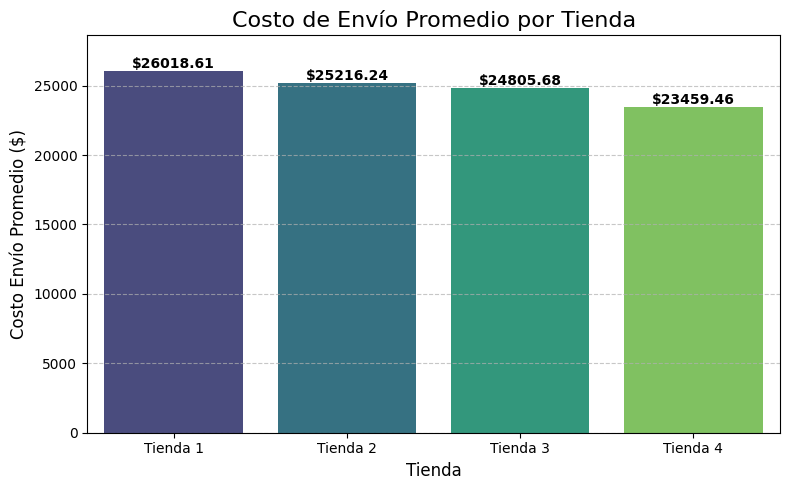

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt #para graficar
import seaborn as sns #para mejor visualización


#carga de datos
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


#definimos los DataFrames y los nombres para la visualización
tiendas_dfs = [tienda, tienda2, tienda3, tienda4]
nombres_para_mostrar = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']


#lista vacía para almacenar los resultados
datos_envio_promedio = []

#iterar sobre las tiendas y sus nombres para calcular y almacenar el promedio
for sucursal_df, nombre_tienda_actual in zip(tiendas_dfs, nombres_para_mostrar):
    #calcular el promedio de envío de la tienda actual (sucursal)
    envio_actual = round(sucursal_df['Costo de envío'].mean(), 2)

    #imprimir el resultado para la tienda actual
    print(f'El envío promedio de {nombre_tienda_actual} es {envio_actual}.-')

    #almacenar el resultado en la lista para el gráfico.
    datos_envio_promedio.append({
        'Tienda': nombre_tienda_actual,
        'Envío Promedio': envio_actual
    })


#convertir la lista de diccionarios en 1 DataFrame de pandas, fuente de datos para el gráfico
df_envio_promedio = pd.DataFrame(datos_envio_promedio)

print("\n--- DataFrame de Costos Envío Promedio para el gráfico ---")
print(df_envio_promedio)
print("\n") #salto de línea


#generar el gráfico de barras
plt.figure(figsize=(8, 5)) #figura y tamaño

#gráfico de barras con seaborn.barplot
sns.barplot(x='Tienda', y='Envío Promedio', data=df_envio_promedio, palette='viridis')

#añadir etiquetas a las barras para mostrar el promedio
for index, row in df_envio_promedio.iterrows():
    #posición X (index) y posición Y (valor del promedio)
    plt.text(row.name, row['Envío Promedio'], f'${row["Envío Promedio"]:.2f}', color='black', ha="center", va='bottom', fontsize=10, weight='bold')

#título del gráfico
plt.title('Costo de Envío Promedio por Tienda', fontsize=16)

#añadir etiquetas a los ejes
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo Envío Promedio ($)', fontsize=12)

#ajustar los límites del eje Y
max_envio = df_envio_promedio['Envío Promedio'].max()
plt.ylim(0, max_envio * 1.1) #ajustar el límite superior del eje Y para que quepan las etiquetas

#añadir una cuadríçula horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

#mejorar la visualización
plt.tight_layout()

#mostrar el gráfico
plt.show()